<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Восстановление-золота-из-руды" data-toc-modified-id="Восстановление-золота-из-руды-1">Восстановление золота из руды</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Цель-работы:" data-toc-modified-id="Цель-работы:-1.0.1">Цель работы:</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Флотация-и-финальные-показатели" data-toc-modified-id="Флотация-и-финальные-показатели-1.1.1">Флотация и финальные показатели</a></span></li><li><span><a href="#Первичная-очистка-и-финальные-показатели" data-toc-modified-id="Первичная-очистка-и-финальные-показатели-1.1.2">Первичная очистка и финальные показатели</a></span></li><li><span><a href="#Вторичная-очистка-и-финальные-показатели" data-toc-modified-id="Вторичная-очистка-и-финальные-показатели-1.1.3">Вторичная очистка и финальные показатели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1.4">Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.2">Анализ данных</a></span><ul class="toc-item"><li><span><a href="#1.-Проверка-параметра-rougher.output.recovery" data-toc-modified-id="1.-Проверка-параметра-rougher.output.recovery-1.2.1">1. Проверка параметра rougher.output.recovery</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.2.2">Вывод:</a></span></li><li><span><a href="#2.-Исследование-тестовой-выборки" data-toc-modified-id="2.-Исследование-тестовой-выборки-1.2.3">2. Исследование тестовой выборки</a></span></li><li><span><a href="#3.-Изменение-концентраций-металлов-на-различных-этапах-очистки" data-toc-modified-id="3.-Изменение-концентраций-металлов-на-различных-этапах-очистки-1.2.4">3. Изменение концентраций металлов на различных этапах очистки</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.2.5">Вывод:</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-1.2.6">Распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.2.7">Вывод:</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-1.3">Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.3.1">Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-1.4">Чек-лист готовности проекта</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

### Цель работы:

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.



## Подготовка данных

Импорт основных библиотек и необходимые функции:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')



def smape(forecast, actual):
    smape=abs(actual-forecast)/(0.5*(abs(actual)+abs(forecast)))
    return smape.sum()*100/smape.shape[0]
        
    

def mae_au_output(actual, C,F,T):     
    mae=0    
    recovery=C*(F-T)*100/(F*(C-T))
    recovery.replace([np.inf, -np.inf], np.nan, inplace=True)
    recovery=recovery.dropna()        
    actual=actual[recovery.index] 
    actual=actual.dropna()   
    
    if len(actual)<len(recovery):
        recovery=recovery[actual.index]
    
    mae=mean_absolute_error(recovery, actual)   
    return mae
    
    
def draw_concentration_hist(metall):
    step1="rougher.input.feed_"+metall
    step2="rougher.output.concentrate_"+metall
    step3="primary_cleaner.output.concentrate_"+metall
    step4="final.output.concentrate_"+metall
    title="Распределение "+ metall+ " на различных этапах очистки"

    plt.figure(figsize=(16,9))
    sns.distplot(gold_recovery_train[step1], label=step1)
    sns.distplot(gold_recovery_train[step2], label=step2)
    sns.distplot(gold_recovery_train[step3], label=step3)
    sns.distplot(gold_recovery_train[step4], label=step4)
    plt.xlabel("Концентрация")
    plt.ylabel("Частота")
    
    plt.legend()
    plt.title(title)
    


def draw_feed_hist(train, test, metall):
    column="rougher.input.feed"+"_"+metall
    if metall=="size":
        title="Распределение размеров гранул: обучающая и тестовая выборки"
    else:
        title="Распределение размеров гранул для "+metall+":обучающая и тестовая выборки"        
    plt.figure(figsize=(16,9))
    sns.distplot(train[column], label='TRAIN')
    sns.distplot(test[column], label='TEST')
    av_train=train[column].mean()
    av_test=test[column].mean()
    plt.xlabel(metall+", размер молекулы")
    plt.ylabel("Частота")    
    plt.axvline(x=av_train, ymin=0, ymax=1, label="Среднее для обучающей:{:.1f}".format(av_train))
    plt.axvline(x=av_test, ymin=0, ymax=1, label="Среднее для тестовой:{:.1f}".format(av_test), linestyle=":")
    plt.legend()
    plt.title(title)
    
def draw_hist(data, title, x_labels, y_labels, label,color):
    plt.figure(figsize=(16,9))
    sns.distplot(data, label=label, color=color)
    plt.xlabel(x_labels)
    plt.ylabel(y_labels)
    plt.title(title)
    plt.legend()

    

Загрузим данные из файлов в data frame:

In [2]:
gold_recovery_train=pd.read_csv('/datasets/gold_recovery_train.csv', sep=',')
gold_recovery_test=pd.read_csv('/datasets/gold_recovery_test.csv', sep=',')
gold_recovery_full=pd.read_csv('/datasets/gold_recovery_full.csv', sep=',')

Проанализируем содержимое каждого из data frame'ов:

In [3]:
gold_recovery_full.describe()
gold_recovery_full.shape

(22716, 87)

In [4]:
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [6]:
gold_recovery_train.head()
gold_recovery_train.shape

(16860, 87)

In [7]:
gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [8]:
gold_recovery_test.head()
gold_recovery_test.shape

(5856, 53)

В исходном датасете 22617 строк и 87 столбцов, есть пропуски. Обучающий и тестовый датасеты сформированы в пропорции 75:25 от исходного, в обучающем также 87 столбцов, в тестовом только 53.

Попробуем разделить данные по этапам процесса и изучить подробнее:

In [9]:
flotation_i=gold_recovery_full.filter(like=('rougher.input'), axis=1)
flotation_o=gold_recovery_full.filter(like=('rougher.output'), axis=1)
pc=gold_recovery_full.filter(like=('primary_cleaner.'), axis=1)
sc=gold_recovery_full.filter(like=('secondary_cleaner.'), axis=1)
final=gold_recovery_full.filter(like=('final.'), axis=1)


### Флотация и финальные показатели

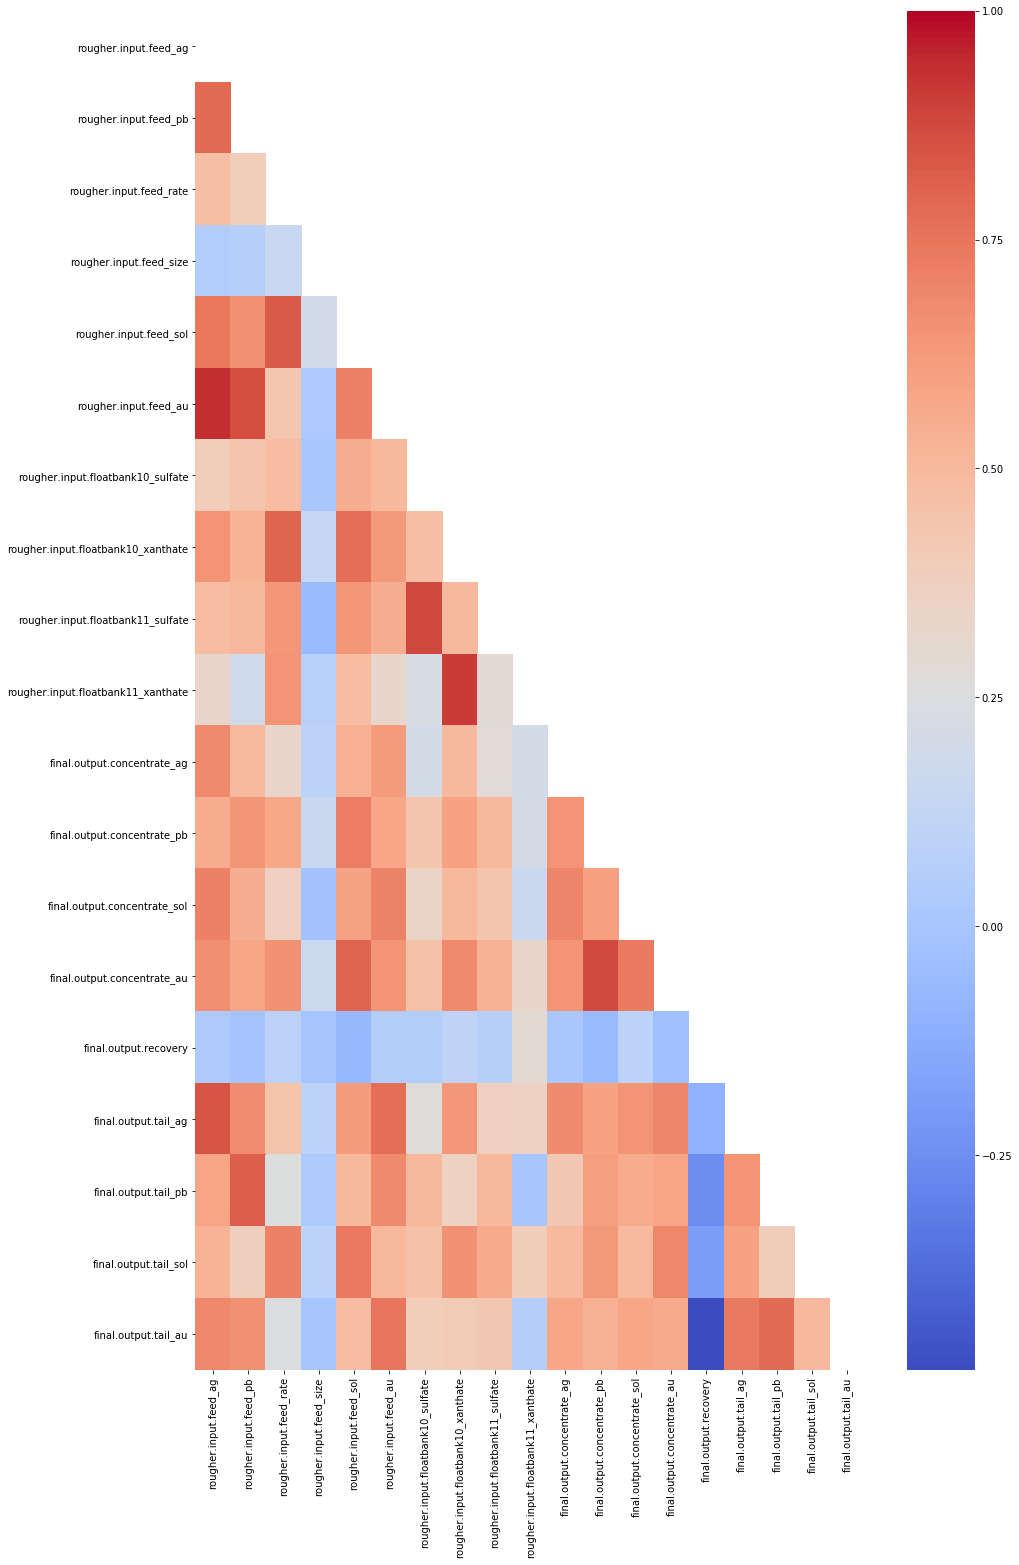

In [10]:
flotation_i=flotation_i.join(final)
pyplot.figure(figsize=(15, 25))
corr_matrix=flotation_i.corr()
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm', mask=matrix)

По матрице можно заметить, что есть связь между концентрацией ртути и концентрацией золота на финальном этапе. Также заметна корреляция между размерами молекул серебра, золота и ртути на этапе флотации.

### Первичная очистка и финальные показатели

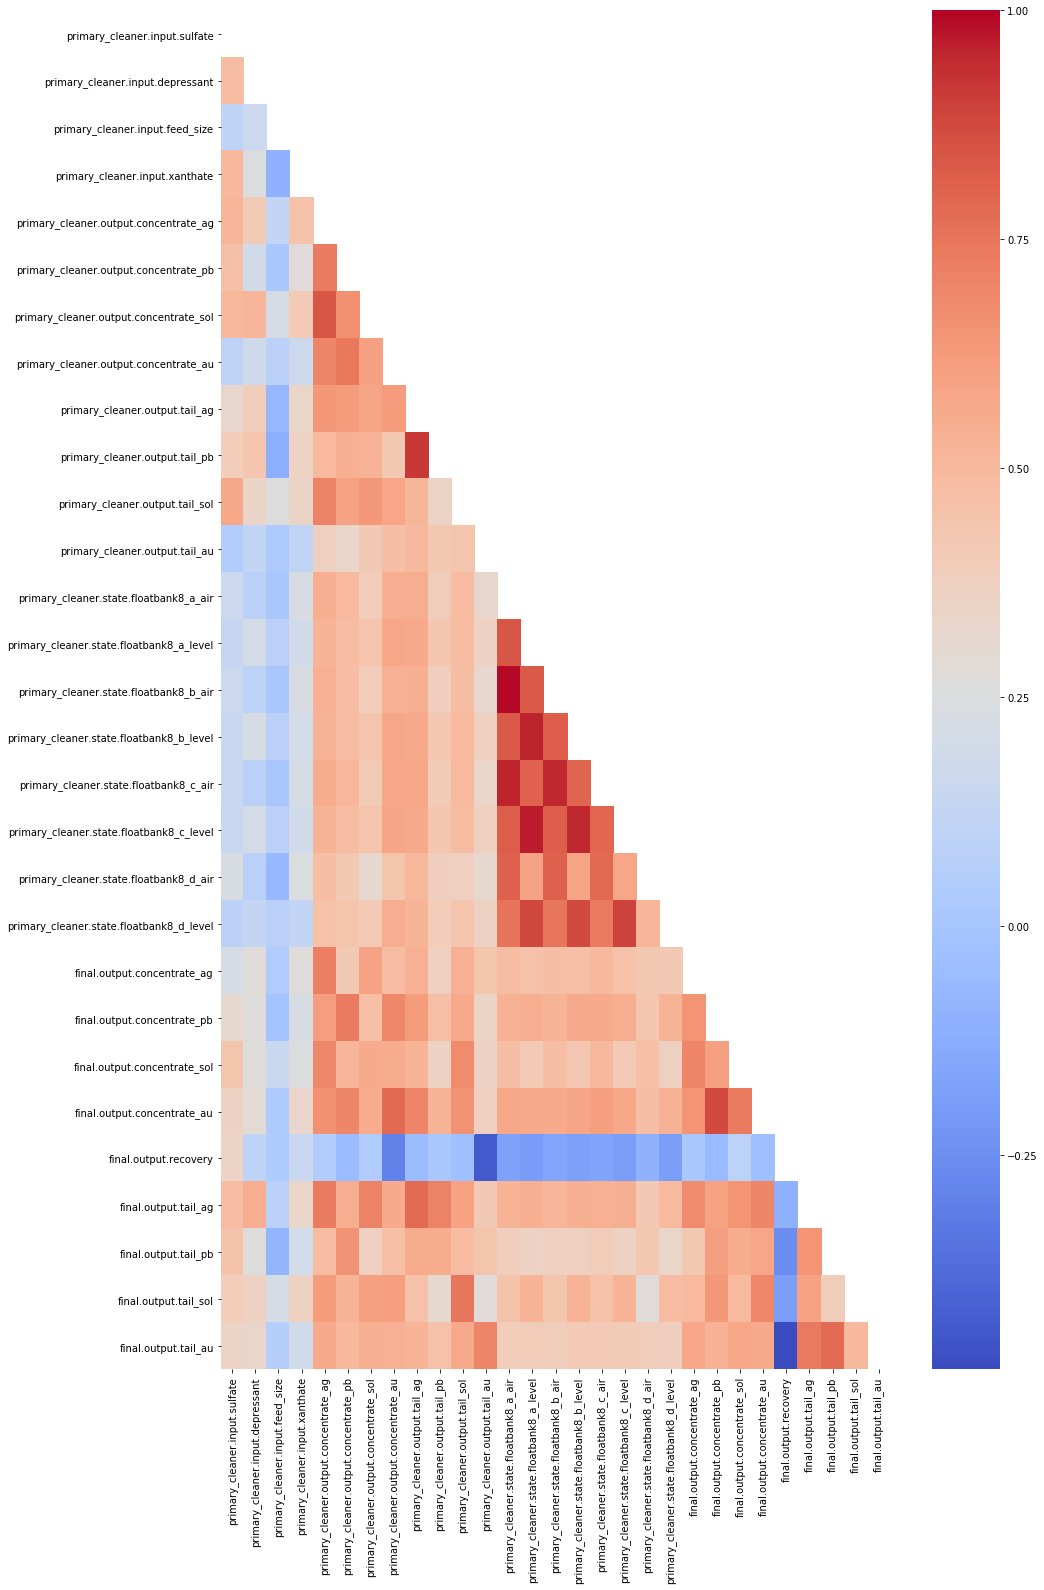

In [11]:
pc=pc.join(final)
pyplot.figure(figsize=(15, 25))
corr_matrix=pc.corr()
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm', mask=matrix)

Здесь можно увидеть, что есть связь между концентрацией ртути и серебра в хвостах после первичной очистки. 

### Вторичная очистка и финальные показатели

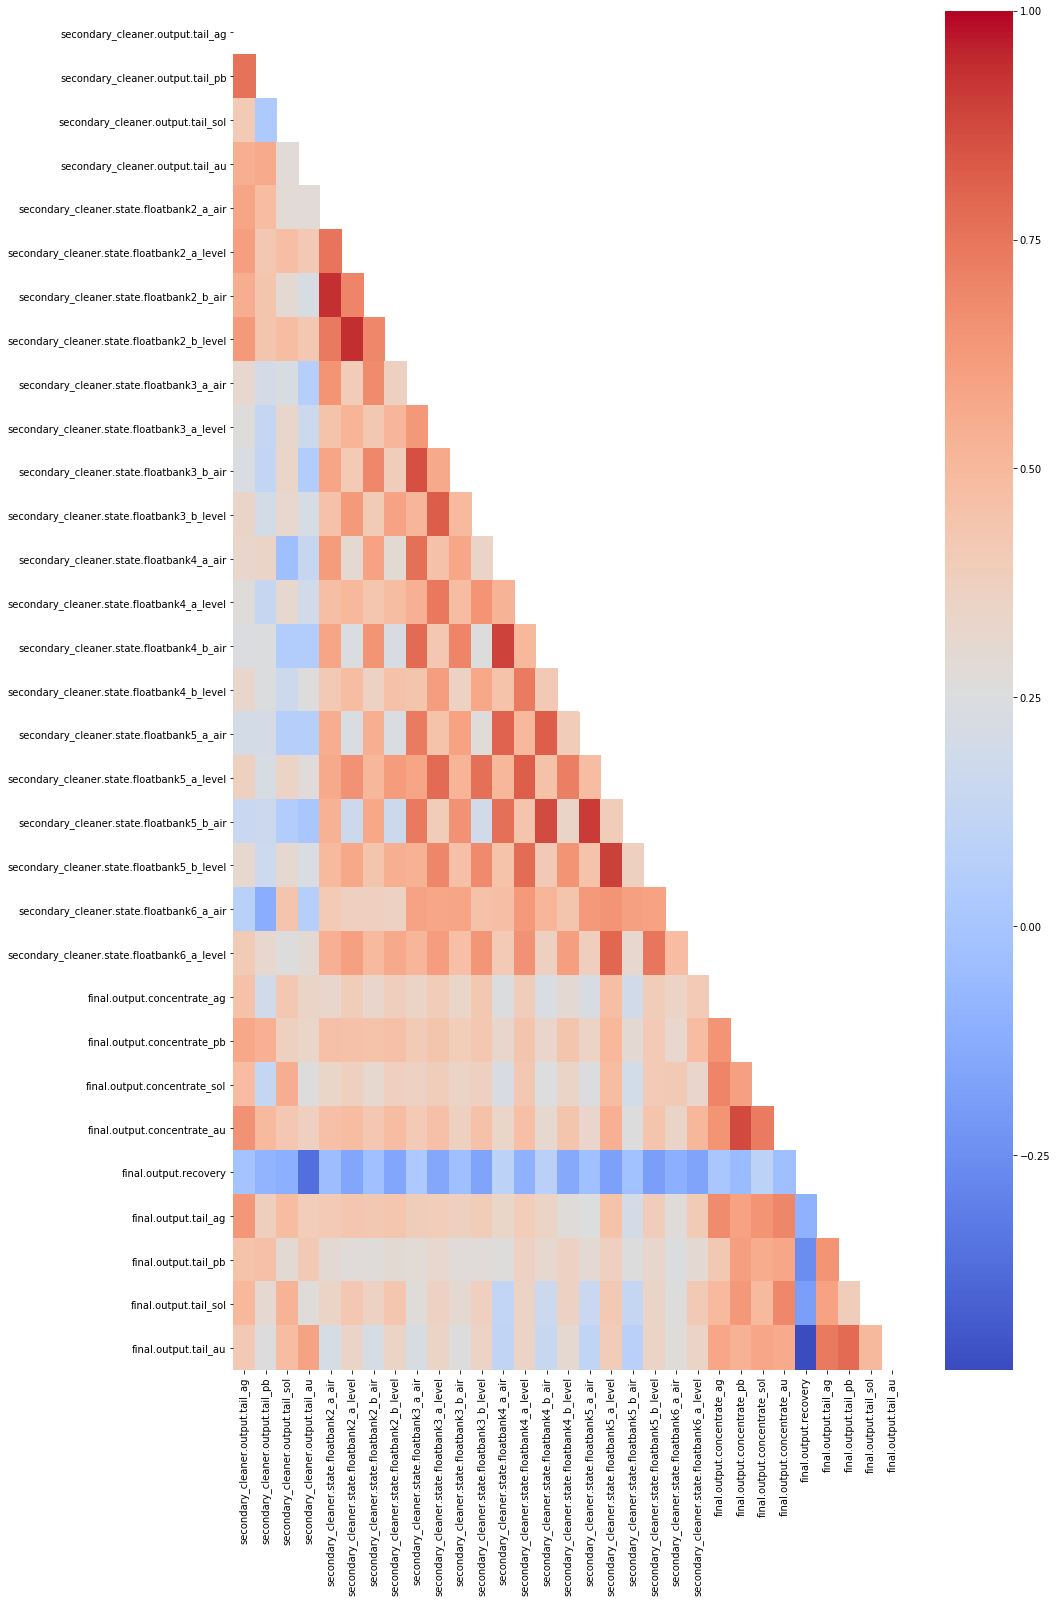

In [12]:
sc=sc.join(final)
pyplot.figure(figsize=(15, 25))
corr_matrix=sc.corr()
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm', mask=matrix)

Здесь зависимостей между параметрами очистки и финальными показателями не выявлено.

### Вывод:
у нас имеются 3 набора данных: обучающая выборка, тестовая выборки и полный набор данных. В исходной и обучающей выборке 87 столбцов с данными по разным этапам очистки, в тестовой только 57. В каждом наборе есть пропуски. При более подробном рассмотрении сильных зависимостей между входными параметрами и финальными результатами выявлено не было, кроме корреляции между концентрацией ртути и концентрации золота на финальном этапе.

## Анализ данных

### 1. Проверка параметра rougher.output.recovery


Проверим правильность вычисления эффективности обогащения. Данный параметр рассчитывается по следующей формуле
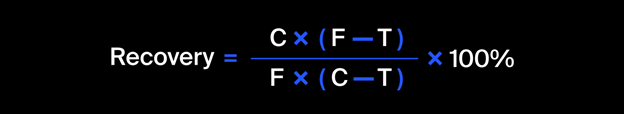

Recovery=C*(F-T)/F(C-T)*100%

где:
•	C — доля золота в концентрате после флотации/очистки;       C=rougher.output.concentrate_au  

•	F — доля золота в сырье/концентрате до флотации/очистки;    F=rougher.input.feed_au

•	T — доля золота в отвальных хвостах после флотации/очистки. T=rougher.output.tail_au



In [13]:
C=gold_recovery_train['rougher.output.concentrate_au']
F=gold_recovery_train['rougher.input.feed_au']
T=gold_recovery_train['rougher.output.tail_au']

print('Среднеквадратичная ошибка rougher.output.recovery :',mae_au_output(gold_recovery_train['rougher.output.recovery'], C,F,T))

Среднеквадратичная ошибка rougher.output.recovery : 1.0898633667227423e-14


### Вывод: 
При сравнении эффективности вычисленной по формуле и эффективности в обучающей выборке порядок ошибка 10 в степени -14, т.е. в обучающей выборке данные вычислены верно.

### 2. Исследование тестовой выборки

Тестовая выборка содержит только 53 колонки, проверим каких признаков не хватает

In [14]:
test_list=gold_recovery_test.columns.to_list()

In [15]:
train_list=gold_recovery_train.columns.to_list()

missed_data=[]

for i in range(len(train_list)):
    if train_list[i] not in test_list:
        missed_data.append(train_list[i])
        
print('Список столбцов, отсутствующих в тестовой выборке:')

missed_data=pd.array(missed_data)
print(missed_data)

Список столбцов, отсутствующих в тестовой выборке:
<PandasArray>
[                       'final.output.concentrate_ag',
                        'final.output.concentrate_pb',
                       'final.output.concentrate_sol',
                        'final.output.concentrate_au',
                              'final.output.recovery',
                               'final.output.tail_ag',
                               'final.output.tail_pb',
                              'final.output.tail_sol',
                               'final.output.tail_au',
              'primary_cleaner.output.concentrate_ag',
              'primary_cleaner.output.concentrate_pb',
             'primary_cleaner.output.concentrate_sol',
              'primary_cleaner.output.concentrate_au',
                     'primary_cleaner.output.tail_ag',
                     'primary_cleaner.output.tail_pb',
                    'primary_cleaner.output.tail_sol',
                     'primary_cleaner.output.tail_au',


Удалим из списка целевые признаки и сохраним его для дальнейшей работы:

In [16]:
missed_data=np.delete(missed_data,np.where((missed_data == 'final.output.recovery' )|(missed_data == 'rougher.output.recovery' )))
missed_data

array(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol',
       'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.tail_ag',
      

В тестовой выборке отсутствуют нужные нам целевые признаки: final.output.recovery и rougher.output.recovery. Также пропущены данные по концентрациям металлов на разных этапах очистки, их мы добавлять из исходной выборки не будем. Добавим в тестовый набор пропущенные целевые значения 'final.output.recovery' и 'rougher.output.recovery'.

In [17]:
gold_recovery_test['final.output.recovery']=gold_recovery_train['final.output.recovery'][gold_recovery_test.index]
gold_recovery_test['rougher.output.recovery']=gold_recovery_train['rougher.output.recovery'][gold_recovery_test.index]

### 3. Изменение концентраций металлов на различных этапах очистки

По условию задачи данные индексируются датой и временем получения информации (признак date) и соседние по времени параметры часто похожи. Заполним пропуски в обучающем датасете используя это условие:

In [18]:
gold_recovery_train=gold_recovery_train.fillna(method='ffill')
gold_recovery_test=gold_recovery_test.fillna(method='ffill')

Проверим концентрацию серебра на различных этапах

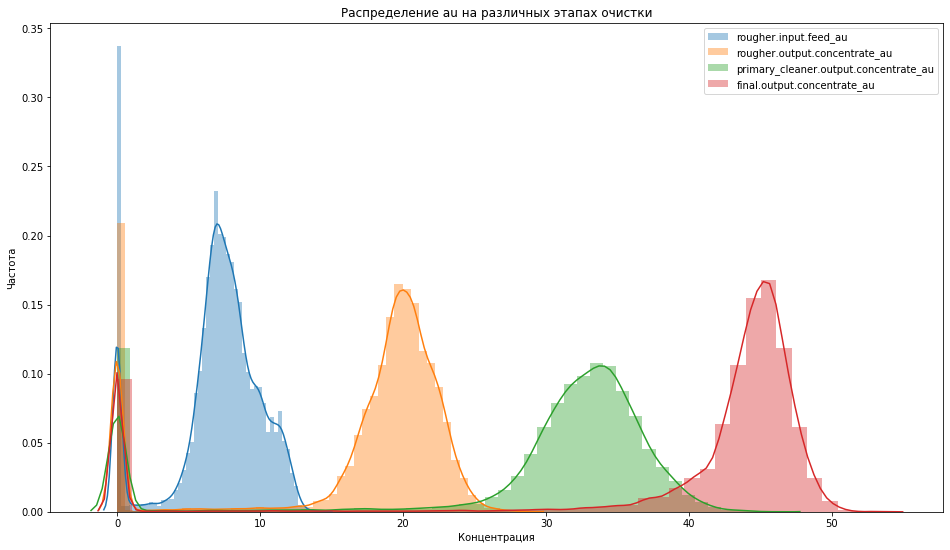

In [19]:
draw_concentration_hist("au")

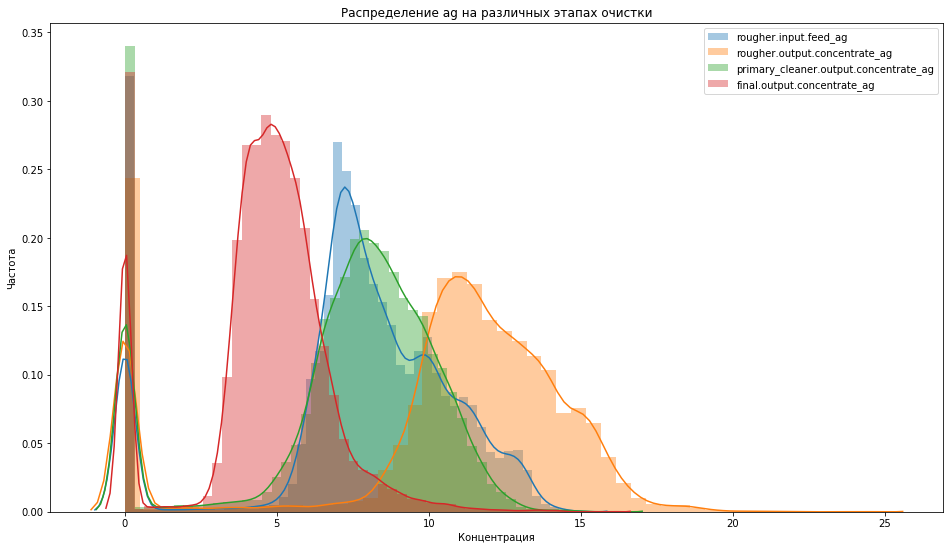

In [20]:
draw_concentration_hist("ag")

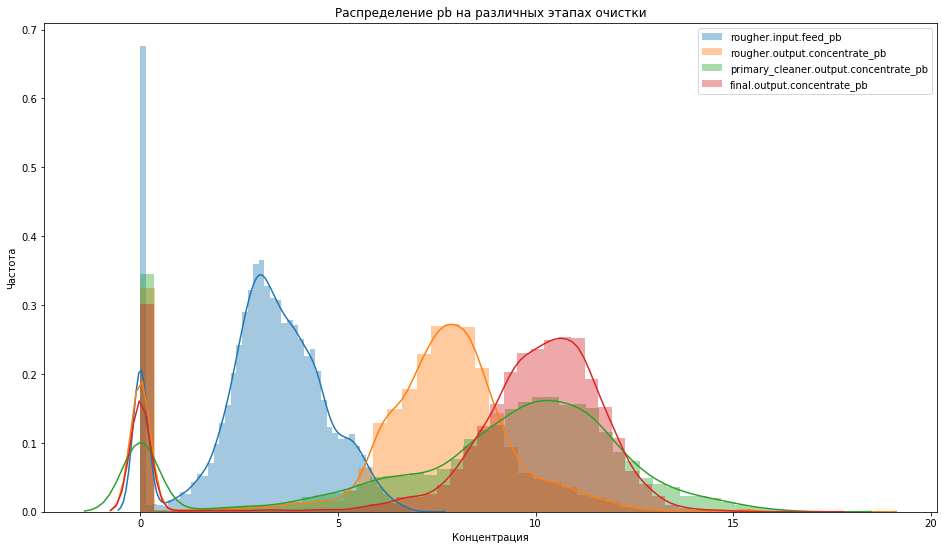

In [21]:
draw_concentration_hist("pb")

### Вывод:
Заметно, что у золота концентрация увеличивается в соответствии с этапами очистки. С серебром ситуация другая, для флотации подается определенное количество, затем после флотации концентрация растет. однако, после двух этапов очисток концентрация наоборот уменьшется. Для ртути ситуация похожа на ситуацию с золотом, концентрация растет после флотации и первичной очистки, вторичная очистка на концентрацию влияет незначительно.

### Распределения размеров гранул сырья на обучающей и тестовой выборках.

Сравним распределения размеров гранул на обучающей и тестовой выборках:

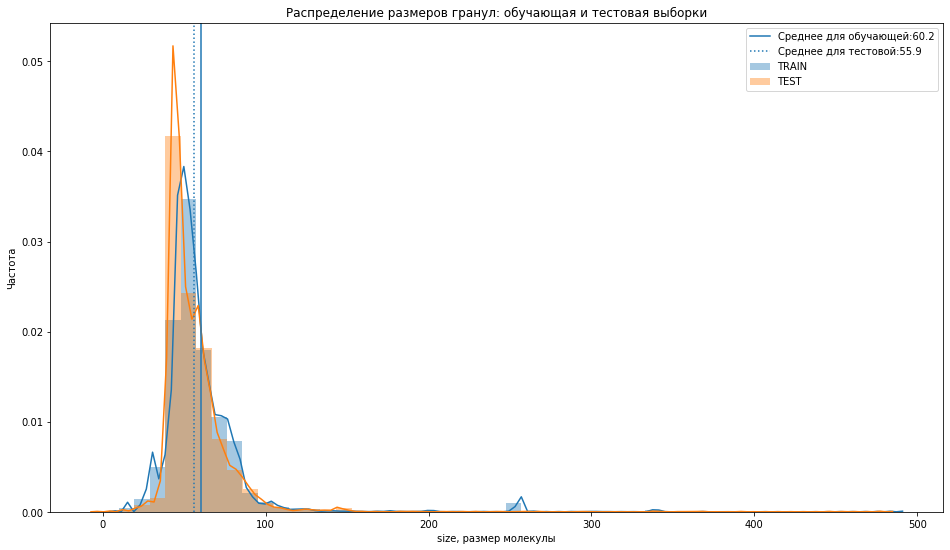

In [22]:
draw_feed_hist(gold_recovery_train, gold_recovery_test, "size")

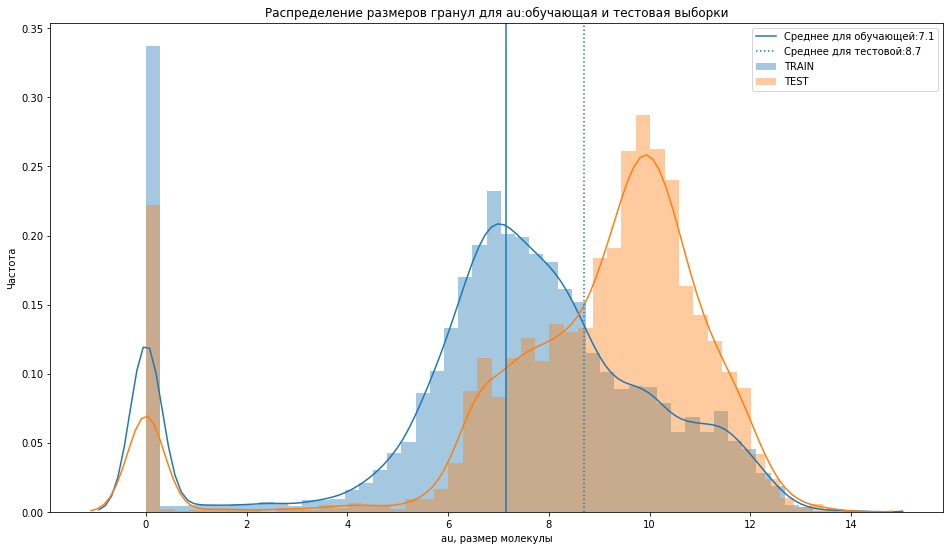

In [23]:
draw_feed_hist(gold_recovery_train, gold_recovery_test, "au")

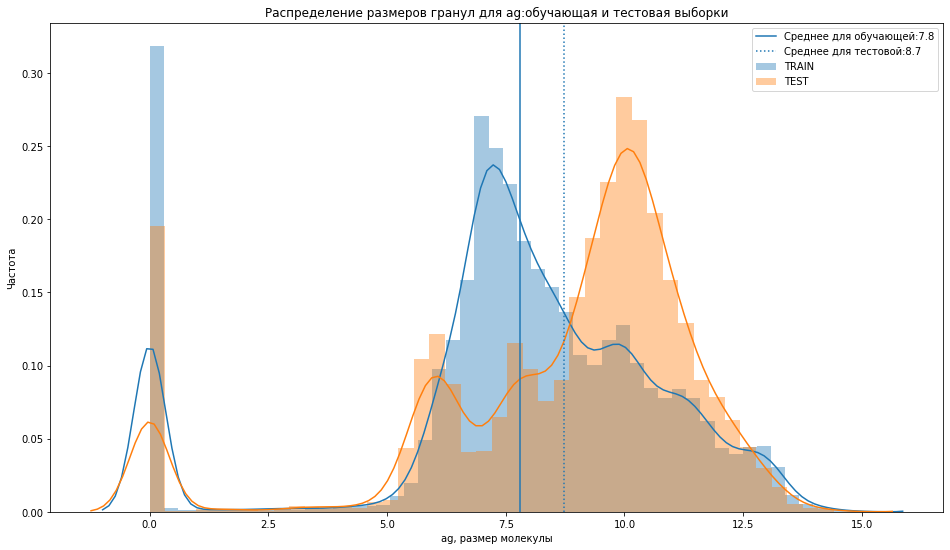

In [24]:
draw_feed_hist(gold_recovery_train, gold_recovery_test, "ag")

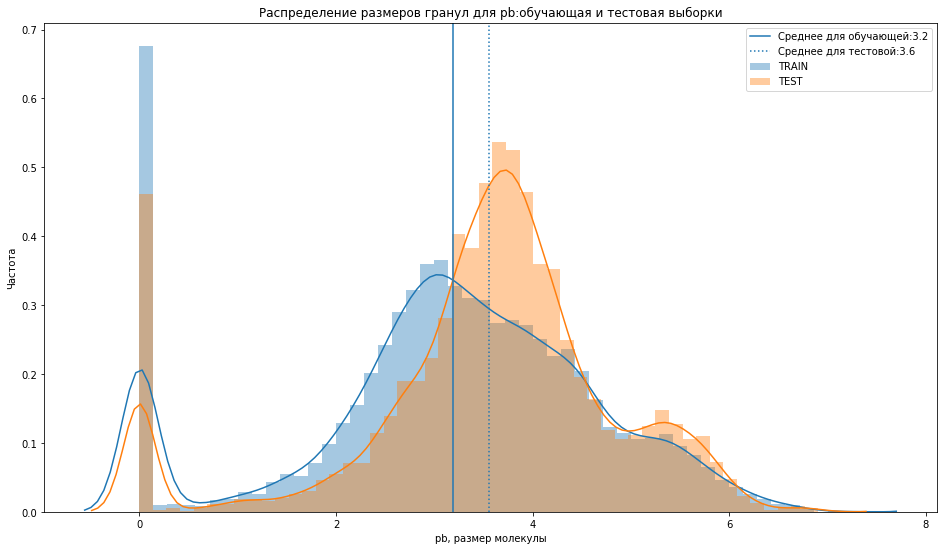

In [25]:
draw_feed_hist(gold_recovery_train, gold_recovery_test, "pb")

### Вывод: 
По гистограммам распределений замено, что обучающая и тестовая выборки имеют похожие распределения размеров модекул сырья, т.е. проблем с обучением модели возникнуть не должно.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
согласен)

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [26]:
final_output=gold_recovery_train.filter(like='final.output.concentrate_').sum(axis=1)
final_output_tail=gold_recovery_train.filter(like='final.output.tail_').sum(axis=1)
primary_cleaner_conc=gold_recovery_train.filter(like='primary_cleaner.output.concentrate').sum(axis=1)
primary_cleaner_tail=gold_recovery_train.filter(like='primary_cleaner.output.tail').sum(axis=1)
rougher_output_conc=gold_recovery_train.filter(like='rougher.output.concentrate').sum(axis=1)
rougher_output_tail=gold_recovery_train.filter(like='rougher.output.tail').sum(axis=1)
secondary_cleaner_output=gold_recovery_train.filter(like='secondary_cleaner.output.tail').sum(axis=1)


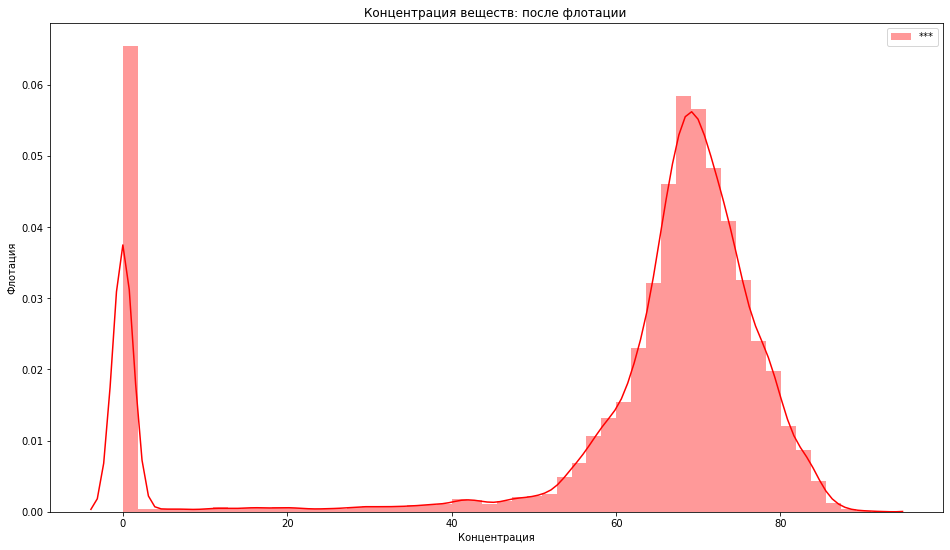

In [27]:
draw_hist(rougher_output_conc,"Концентрация веществ: после флотации ", "Концентрация", "Флотация","***", 'red')

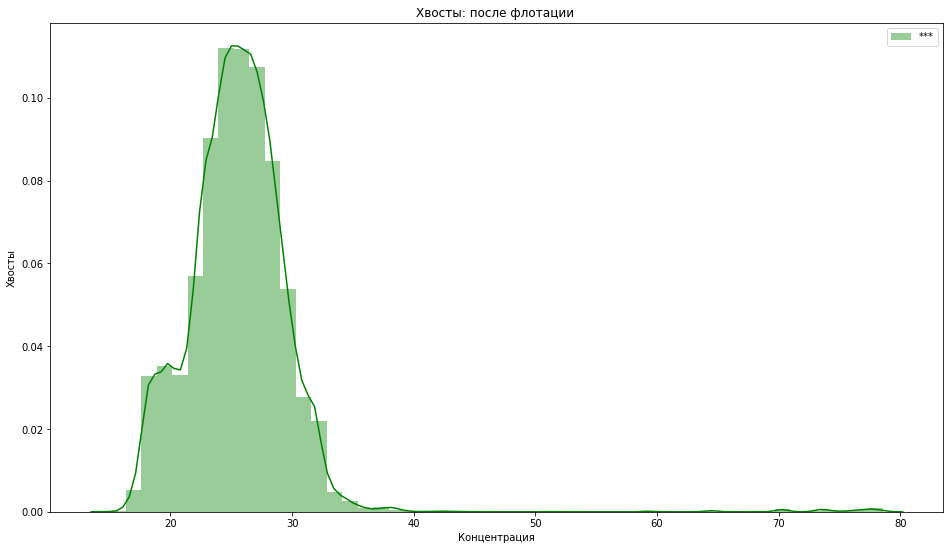

In [28]:
draw_hist(rougher_output_tail,"Хвосты: после флотации ", "Концентрация", "Хвосты","***", 'green')

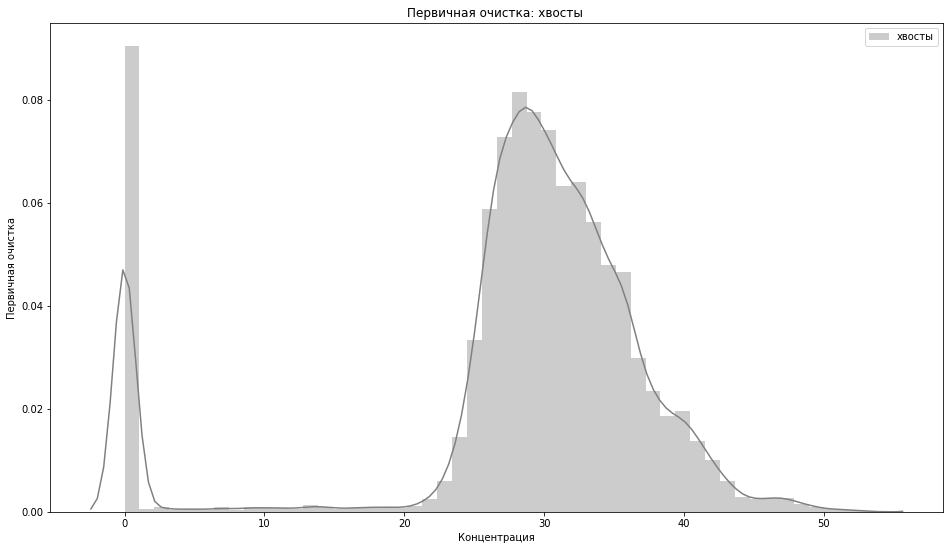

In [29]:
draw_hist(primary_cleaner_tail,"Первичная очистка: хвосты ", "Концентрация", "Первичная очистка","хвосты", 'grey')

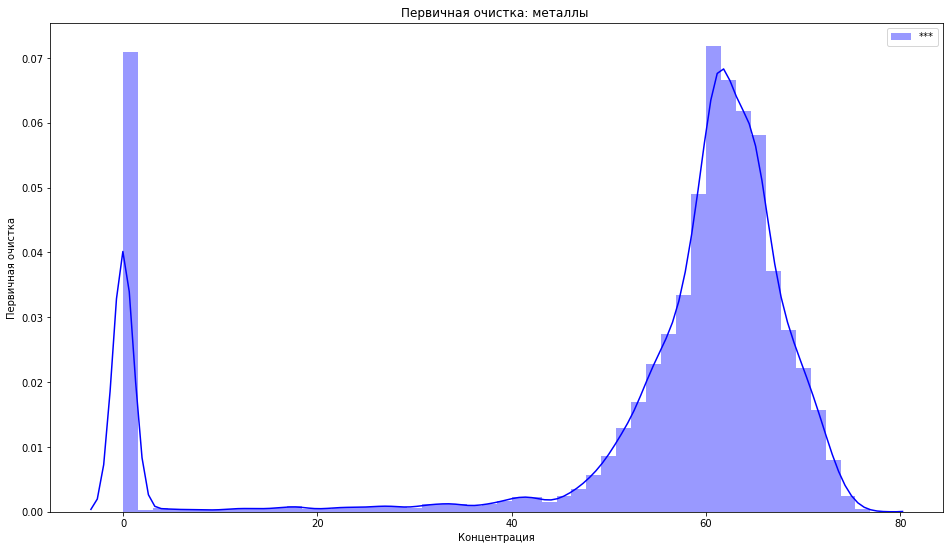

In [30]:
draw_hist(primary_cleaner_conc,"Первичная очистка: металлы ", "Концентрация", "Первичная очистка","***", 'blue')

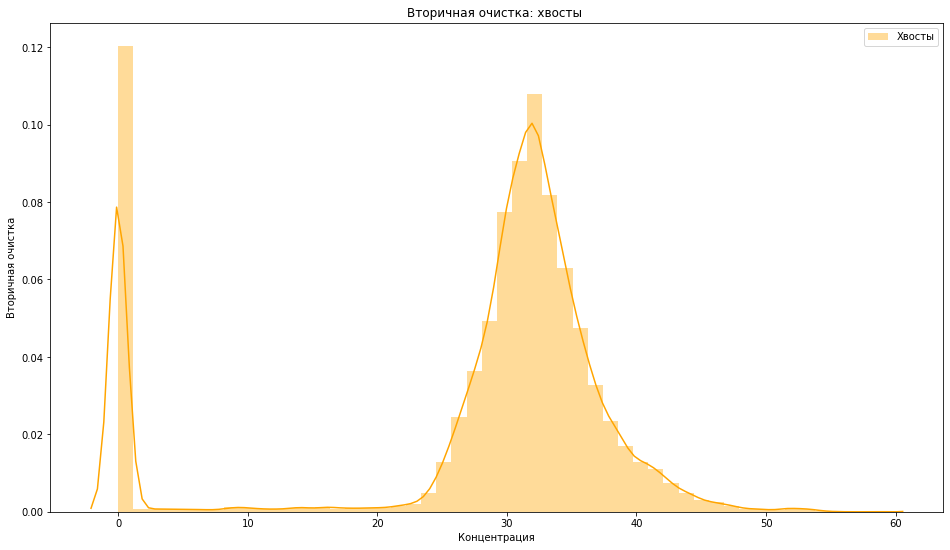

In [31]:
draw_hist(secondary_cleaner_output,"Вторичная очистка: хвосты ", "Концентрация", "Вторичная очистка","Хвосты", 'orange')

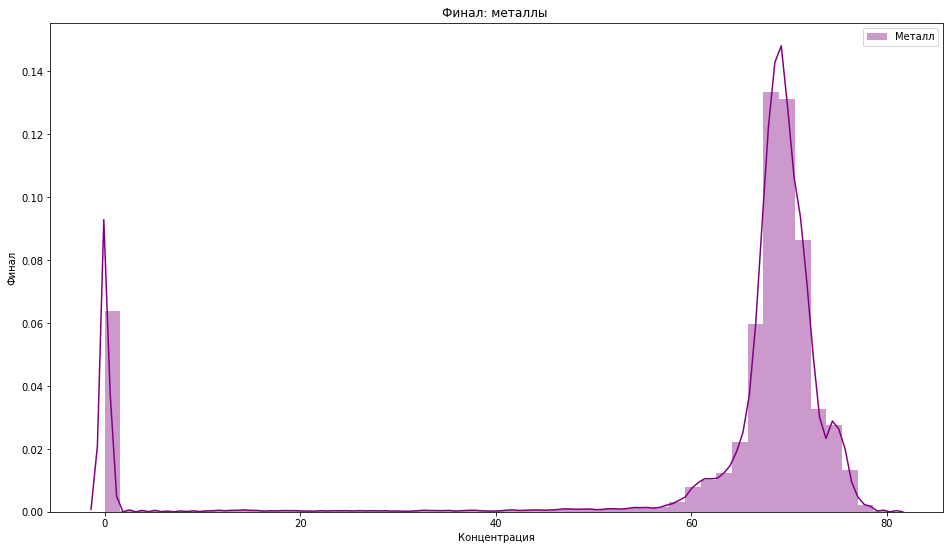

In [32]:
draw_hist(final_output,"Финал: металлы ", "Концентрация", "Финал","Металл", 'purple')

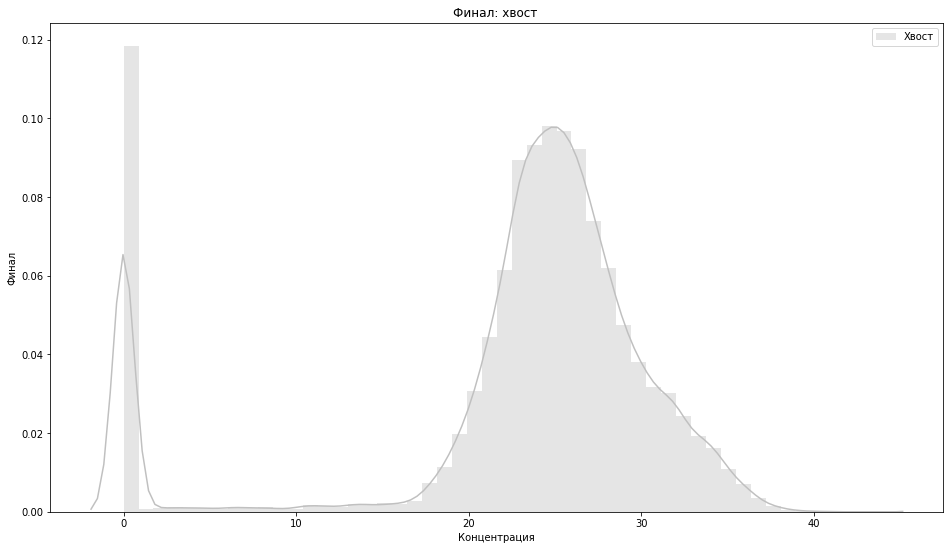

In [33]:
draw_hist(final_output_tail,"Финал: хвост ", "Концентрация", "Финал","Хвост", 'silver')

На графиках видно, что на могих этапах суммарная концентрация равна 0 или приближенным к нему значениям. По графикам видно, что большая часть значений лежит в нормальных числовых интервалах и эти хвосты, скорее всего либо пропущенные данные либо ошибки, которые лучше удалить.

In [34]:
gold_recovery_train=gold_recovery_train.drop(gold_recovery_train[gold_recovery_train.filter(like='rougher.output.concentrate').sum(axis=1)<1].index)

In [35]:
gold_recovery_train=gold_recovery_train.drop(gold_recovery_train[gold_recovery_train.filter(like='primary_cleaner.output.tail').sum(axis=1)<1].index)

In [36]:
gold_recovery_train=gold_recovery_train.drop(gold_recovery_train[gold_recovery_train.filter(like='primary_cleaner.output.concentrate').sum(axis=1)<1].index)

In [37]:
gold_recovery_train=gold_recovery_train.drop(gold_recovery_train[gold_recovery_train.filter(like='secondary_cleaner.output.tail').sum(axis=1)<1].index)

In [38]:
gold_recovery_train=gold_recovery_train.drop(gold_recovery_train[gold_recovery_train.filter(like='final.output.concentrate_').sum(axis=1)<1].index)

In [39]:
gold_recovery_train=gold_recovery_train.drop(gold_recovery_train[gold_recovery_train.filter(like='final.output.tail_').sum(axis=1)<1].index)

## Модель

Для решения данной задачи нам подходят 3 модели: линейная регрессия, случайный лес и дерево решений.

Подготовим обучающую и тестовую выборки. В тестовой выборке отсутсвуют данные, соответсвенно и обучать модели будем на том же наборе данных:

In [40]:
features=gold_recovery_train.drop('date', axis=1)
features=features.drop(missed_data, axis=1)

In [41]:
target_train=features[['final.output.recovery','rougher.output.recovery']]
features_train=features.drop(['final.output.recovery','rougher.output.recovery'], axis=1)

С помощью подбора параметров найдем лучшие модели:
1. Cлучайный лес

In [50]:
RF_model=RandomForestRegressor(random_state=12345)



parametrs = { 'n_estimators': range (10, 15),
              'max_depth': range (5,8),
               'min_samples_leaf': range(5,8)}

grid = GridSearchCV(RF_model, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_
RF_model=RF_model.set_params(**grid.best_params_)
RF_model.fit(features_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

2. Дерево решений:

In [ ]:
DT_model=DecisionTreeRegressor()



parametrs = { 'max_depth': range (5,8),
            'min_samples_leaf': range(3,5)}


grid = GridSearchCV(DT_model, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_
DT_model=DT_model.set_params(**grid.best_params_)
DT_model.fit(features_train, target_train)

3. Линейная регрессия:

In [ ]:
LR_model=LinearRegression()
LR_model.fit(features_train, target_train)

Вычислим SMAPE на обучающей выборке по каждой из моделей

In [ ]:
RF_prediction_train=RF_model.predict(features_train)
SMAPE=0.25*smape(RF_prediction_train[:,1], target_train['rougher.output.recovery'])+0.75*smape(RF_prediction_train[:,0], target_train['final.output.recovery'])
print('SMAPE леса', round(SMAPE,3))

In [ ]:
DT_prediction_train=DT_model.predict(features_train)
SMAPE=0.25*smape(DT_prediction_train[:,1], target_train['rougher.output.recovery'])+0.75*smape(DT_prediction_train[:,0], target_train['final.output.recovery'])
print('SMAPE дерева', round(SMAPE,3))

In [ ]:
LR_prediction_train=LR_model.predict(features_train)
SMAPE=0.25*smape(LR_prediction_train[:,1], target_train['rougher.output.recovery'])+0.75*smape(LR_prediction_train[:,0], target_train['final.output.recovery'])
print('SMAPE регрессии:', round(SMAPE,3))

Пока лучший результат показал случайный лес с подбором гиперпараметров.

Протестируем и вычислим SMAPE по каждой модели уже на тестовой выборке

In [44]:
features_t=gold_recovery_test.drop(['date'], axis=1)

In [45]:
target_test=features_t[['final.output.recovery','rougher.output.recovery']]
features_test=features_t.drop(['final.output.recovery','rougher.output.recovery'], axis=1)

In [51]:
RF_prediction=RF_model.predict(features_test)
SMAPE=0.25*smape(RF_prediction[:,1], target_test['rougher.output.recovery'])+0.75*smape(RF_prediction[:,0], target_test['final.output.recovery'])
print('SMAPE леса', round(SMAPE,3))

SMAPE леса 14.566


Протестируем дерево:

In [ ]:
DT_prediction=DT_model.predict(features_test)
SMAPE_DT=0.25*smape(DT_prediction[:,1], target_test['rougher.output.recovery'])+0.75*smape(DT_prediction[:,0], target_test['final.output.recovery'])
print('SMAPE дерева', round(SMAPE_DT,3))

И регрессия:

In [ ]:
LR_prediction=LR_model.predict(features_test)
SMAPE_LR=0.25*smape(LR_prediction[:,1], target_test['rougher.output.recovery'])+0.75*smape(LR_prediction[:,0], target_test['final.output.recovery'])
print('SMAPE регрессии', round(SMAPE_LR,3))

На тестовой выборке лучшие результаты опять показал случайный лес

Вычислим SMAPE константной модели(среднее тестовой выборки):

In [52]:
r=target_train['rougher.output.recovery'].mean()
f=target_train['final.output.recovery'].mean()

dumb_r=np.array([])
dumb_f=np.array([])

for i in range (len(target_test['rougher.output.recovery'])):
    dumb_r=np.append(dumb_r,r)
    dumb_f=np.append(dumb_f,f)

    
SMAPE_dumb=0.25*smape(RF_prediction[:,0], dumb_r)+0.75*smape(RF_prediction[:,1], dumb_f)
print('SMAPE леса на константной модели', round(SMAPE_dumb,3))

SMAPE леса на константной модели 21.842


Значение на константной модели выше, чем на тестовой и обучающей выборках. Можно сделать вывод, что выбранная модель рабочая.

In [56]:
r=target_train['rougher.output.recovery'].mean()
f=target_train['final.output.recovery'].mean()

dumb_r=np.array([])
dumb_f=np.array([])

for i in range (len(target_test['rougher.output.recovery'])):
    dumb_r=np.append(dumb_r,r)
    dumb_f=np.append(dumb_f,f)

    
SMAPE_dumb=0.25*smape(target_test['rougher.output.recovery'], dumb_r)+0.75*smape(target_test['final.output.recovery'], dumb_f)
print('SMAPE леса на константной модели', round(SMAPE_dumb,3))

SMAPE леса на константной модели 12.666


### Вывод:
После подбора параметров, обучения и тестирования всех моделей лучшие результаты показал случайный лес. Данная модель имеет наименьший коэффициент отклонения SMAPE на обучающей и тестовой выборках.